In [38]:
import wrds

db = wrds.Connection(wrds_username="andyli26")

Loading library list...
Done


In [39]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

gathering raw data from the WRDS databases as a starting point

thanks to the Connection to the WRDS database (through variable "db"), we can access all tables from all libraries in WRDS

db.list_libraries()

db.list_tables(library)

db.describe_table(library, table)

In [73]:
sp500_tickers = ['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APP',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'CEG',
 'COO',
 'CPRT',
 'GLW',
 'CPAY',
 'CTVA',
 'CSGP',
 'COST',
 'CTRA',
 'CRWD',
 'CCI',
 'CSX',
 'CMI',
 'CVS',
 'DHR',
 'DRI',
 'DDOG',
 'DVA',
 'DAY',
 'DECK',
 'DE',
 'DELL',
 'DAL',
 'DVN',
 'DXCM',
 'FANG',
 'DLR',
 'DG',
 'DLTR',
 'D',
 'DPZ',
 'DASH',
 'DOV',
 'DOW',
 'DHI',
 'DTE',
 'DUK',
 'DD',
 'ETN',
 'EBAY',
 'ECL',
 'EIX',
 'EW',
 'EA',
 'ELV',
 'EME',
 'EMR',
 'ETR',
 'EOG',
 'EPAM',
 'EQT',
 'EFX',
 'EQIX',
 'EQR',
 'ERIE',
 'ESS',
 'EL',
 'EG',
 'EVRG',
 'ES',
 'EXC',
 'EXE',
 'EXPE',
 'EXPD',
 'EXR',
 'XOM',
 'FFIV',
 'FDS',
 'FICO',
 'FAST',
 'FRT',
 'FDX',
 'FIS',
 'FITB',
 'FSLR',
 'FE',
 'F',
 'FTNT',
 'FTV',
 'FOXA',
 'BEN',
 'FCX',
 'GRMN',
 'IT',
 'GE',
 'GEHC',
 'GEV',
 'GEN',
 'GNRC',
 'GD',
 'GIS',
 'GM',
 'GPC',
 'GILD',
 'GPN',
 'GL',
 'GDDY',
 'GS',
 'HAL',
 'HIG',
 'HAS',
 'HCA',
 'DOC',
 'HSIC',
 'HSY',
 'HPE',
 'HLT',
 'HOLX',
 'HD',
 'HON',
 'HRL',
 'HST',
 'HWM',
 'HPQ',
 'HUBB',
 'HUM',
 'HBAN',
 'HII',
 'IBM',
 'IEX',
 'IDXX',
 'ITW',
 'INCY',
 'IR',
 'PODD',
 'INTC',
 'IBKR',
 'ICE',
 'IFF',
 'IP',
 'IPG',
 'INTU',
 'ISRG',
 'IVZ',
 'INVH',
 'IQV',
 'IRM',
 'JBHT',
 'JBL',
 'JKHY',
 'J',
 'JNJ',
 'JCI',
 'JPM',
 'K',
 'KVUE',
 'KDP',
 'KEY',
 'KEYS',
 'KMB',
 'KIM',
 'KMI',
 'KKR',
 'KLAC',
 'KHC',
 'KR',
 'LHX',
 'LH',
 'LRCX',
 'LW',
 'LVS',
 'LDOS',
 'LEN',
 'LII',
 'LLY',
 'LIN',
 'LYV',
 'LKQ',
 'LMT',
 'L',
 'LOW',
 'LULU',
 'LYB',
 'MTB',
 'MPC',
 'MAR',
 'MMC',
 'MLM',
 'MAS',
 'MA',
 'MTCH',
 'MKC',
 'MCD',
 'MCK',
 'MDT',
 'MRK',
 'META',
 'MET',
 'MTD',
 'MGM',
 'MCHP',
 'MU',
 'MSFT',
 'MAA',
 'MRNA',
 'MHK',
 'MOH',
 'MDLZ',
 'MPWR',
 'MNST',
 'MCO',
 'MS',
 'MOS',
 'MSI',
 'MSCI',
 'NDAQ',
 'NTAP',
 'NFLX',
 'NEM',
 'NWSA',
 'NEE',
 'NKE',
 'NI',
 'NDSN',
 'NSC',
 'NTRS',
 'NOC',
 'NCLH',
 'NRG',
 'NUE',
 'NVDA',
 'NVR',
 'NXPI',
 'ORLY',
 'OXY',
 'ODFL',
 'OMC',
 'ON',
 'OKE',
 'ORCL',
 'OTIS',
 'PCAR',
 'PKG',
 'PLTR',
 'PANW',
 'PH',
 'PAYX',
 'PAYC',
 'PYPL',
 'PNR',
 'PEP',
 'PFE',
 'PCG',
 'PM',
 'PSX',
 'PNW',
 'PNC',
 'POOL',
 'PPG',
 'PPL',
 'PFG',
 'PG',
 'PGR',
 'PLD',
 'PRU',
 'PEG',
 'PTC',
 'PSA',
 'PHM',
 'PWR',
 'QCOM',
 'DGX',
 'Q',
 'RL',
 'RJF',
 'RTX',
 'O',
 'REG',
 'REGN',
 'RF',
 'RSG',
 'RMD',
 'RVTY',
 'HOOD',
 'ROK',
 'ROL',
 'ROP',
 'ROST',
 'RCL',
 'SPGI',
 'CRM',
 'SBAC',
 'SLB',
 'STX',
 'SRE',
 'NOW',
 'SHW',
 'SPG',
 'SWKS',
 'SJM',
 'SW',
 'SNA',
 'SOLV',
 'SO',
 'LUV',
 'SWK',
 'SBUX',
 'STT',
 'STLD',
 'STE',
 'SYK',
 'SMCI',
 'SYF',
 'SNPS',
 'SYY',
 'TMUS',
 'TROW',
 'TTWO',
 'TPR',
 'TRGP',
 'TGT',
 'TEL',
 'TDY',
 'TER',
 'TSLA',
 'TXN',
 'TPL',
 'TXT',
 'TMO',
 'TJX',
 'TKO',
 'TTD',
 'TSCO',
 'TT',
 'TDG',
 'TRV',
 'TRMB',
 'TFC',
 'TYL',
 'TSN',
 'USB',
 'UBER',
 'UDR',
 'ULTA',
 'UNP',
 'UAL',
 'UPS',
 'URI',
 'UNH',
 'UHS',
 'VLO',
 'VTR',
 'VLTO',
 'VRSN',
 'VRSK',
 'VZ',
 'VRTX',
 'VTRS',
 'VICI',
 'V',
 'VST',
 'VMC',
 'WRB',
 'GWW',
 'WAB',
 'WMT',
 'DIS',
 'WBD',
 'WM',
 'WAT',
 'WEC',
 'WFC',
 'WELL',
 'WST',
 'WDC',
 'WY',
 'WSM',
 'WMB',
 'WTW',
 'WDAY',
 'WYNN',
 'XEL',
 'XYL',
 'YUM',
 'ZBRA',
 'ZBH',
 'ZTS']

# taken out because prices not available in crsp.dsf: ['BRK.B','BF.B','PSKY','SOLS','XYZ','FI','STZ','TAP']
# TODO: need to enhance function to match permno with ticker better; currently causing errors, particularly with STZ and TAP


In [98]:
def retrieve_total_assets_table(tickers_list):
    query1 = """
    SELECT gvkey, tic, datadate, fyearq, atq
    FROM comp.fundq
    WHERE tic IN (
    """
    query2 = ") ORDER BY tic, datadate;"
    query3 = str(tickers_list)
    query3 = query3[1:]
    query3 = query3[:-1]
    query = query1 + query3 + query2
    df = db.raw_sql(query)
    return df

In [100]:
def check_for_missing_tickers(df, tickers_list):
    found = df['tic'].unique()
    missing = [xxx for xxx in tickers_list if xxx not in found]
    return missing

In [102]:
check_for_missing_tickers(df, sp500_tickers)

[]

<h2>Now that we have the raw data, we need to calculate total asset growth and rank them</h2>

In [77]:
# function below is defined for a String parameter
def get_quarter_year(date_str): # assigns each date into a bucket --> Q1: jan 1 - mar 31, Q2: apr 1 - june 30, Q3: july 1 - sep 30, Q4: oct 1 - dec 31
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    year = date_obj.year
    quarter = (date_obj.month - 1) // 3 + 1
    return str(year) + '_Q' + str(quarter)

# this is a new function designed to be applied to a Series of String objects!! allows for the above function to be applied to an entire dataframe column
get_quarter_year_vectorized = np.vectorize(get_quarter_year) 

# adds a new column to the overarching df table (stores all the data from the comp.fundq table) representing the year_quarter (as a String) based on the datadate in each row
# df['q'] = get_quarter_year_vectorized(df['datadate'])

In [103]:
def retrieve_total_assets_pivot_table(df):
    df['q'] = get_quarter_year_vectorized(df['datadate'])
    df_multi = df.drop(['fyearq','gvkey'], axis=1)
    df_total_asset = df_multi.reset_index().pivot_table(index='q', columns='tic', values='atq', aggfunc='mean')
    return df_total_asset

In [106]:
'''
df_multi = df.set_index(['tic','q']) # not necessary since we use pivot table to choose the index and column; combination of index and column has to be unique, or use an aggregate function
df_multi = df_multi.drop(['fyearq','gvkey'], axis=1) # don't need these columns

# create a new table --> pivot table i.e. each row is a quarter, each column is a ticker, and each value is the company's total asset value at the end of the given quarter
df_total_asset = df_multi.reset_index().pivot_table(index='q', columns='tic', values='atq', aggfunc='mean') # focus is on pivot_table(), agg_func handles duplicates
'''

"\ndf_multi = df.set_index(['tic','q']) # not necessary since we use pivot table to choose the index and column; combination of index and column has to be unique, or use an aggregate function\ndf_multi = df_multi.drop(['fyearq','gvkey'], axis=1) # don't need these columns\n\n# create a new table --> pivot table i.e. each row is a quarter, each column is a ticker, and each value is the company's total asset value at the end of the given quarter\ndf_total_asset = df_multi.reset_index().pivot_table(index='q', columns='tic', values='atq', aggfunc='mean') # focus is on pivot_table(), agg_func handles duplicates\n"

<h2> df_total_asset is cleaned matrix storing ticker total asset value at each quarter </h2>

next goal: create a new table df_tag for total asset growth quarter-over-quarter

In [110]:
df_total_asset = retrieve_total_assets_pivot_table(df)

In [111]:
df_total_asset # each value shows total asset value at the end of the labeled quarter

tic,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
q,,,,,,,,,,,,,,,,,,,,,
1962_Q1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1962_Q2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1962_Q3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1962_Q4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1963_Q1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024_Q3,10996.0,364980.0,143422.0,22172.0,74356.0,73656.0,55932.363,29830.0,48618.374,52199.0,...,27168.0,16668.0,14111.399,69286.0,461916.0,16046.0,6461.0,21720.3,7690.0,14357.0
2024_Q4,11846.0,344085.0,135161.0,20959.0,81414.0,70906.0,59868.07,30230.0,48228.277,53271.0,...,27681.0,16536.0,12977.963,70035.0,453475.0,16493.0,6727.0,21365.3,7968.0,14237.0
2025_Q1,11914.0,331233.0,136165.0,25056.0,81448.0,75176.0,59869.756,29955.0,47967.546,53402.0,...,28064.0,16520.0,12724.044,72749.0,451908.0,16559.0,6659.0,22183.9,7899.0,14098.0


(np.float64(192.0), np.float64(248.0))


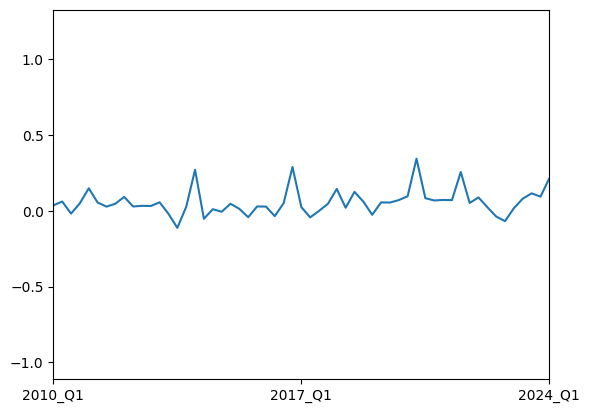

In [112]:
# creates a new table! same layout as above (rows are dates, columns are tickers) but the values are total asset growth quarter over quarter for each stock
def retrieve_tag_pivot_table(df_total_assets, quarters_lag):
    return df_total_assets/df_total_assets.shift(quarters_lag)-1
df_tag = retrieve_tag_pivot_table(df_total_asset, 1)

# plotting an example
fig, ax = plt.subplots()
ax.plot(df_tag['NVDA'])
ax.set_xlim('2010_Q1','2024_Q1')
current_xlim = plt.xlim()
ax.set_xticks(['2010_Q1','2017_Q1','2024_Q1'])
print(current_xlim)
fig.show()

In [114]:
# creates a new df! storing the ranks (ranking the values by row, i.e. each quarter should have one 1, one 2, one 3, ...)
# lowest ranking implies lowest total asset growth
def retrieve_rank_pivot_table(df_tag):
    return df_tag.rank(axis=1)

def retrieve_weights_pivot_table(df_rank):
    df_rank[df_rank > 100] = None
    df_rank[df_rank <= 100] = 0.01
    return df_rank

In [117]:
df_weights = retrieve_weights_pivot_table(retrieve_rank_pivot_table(df_tag))
# df_weights[(df_weights.index >= '2010_Q1') & (df_weights.index <= '2024_Q4')]
df_weights_cropped = df_weights[(df_weights.index >= '2010_Q1') & (df_weights.index <= '2024_Q4')]

<h2> Incorporating prices into the backtest -- df_weights is our "test portfolio" </h2>

In [121]:
def retrieve_stock_prices(tickers_list, start_date='20100101'):
    query1 = f"""
    SELECT b.ticker, a.prc, a.date FROM crsp.dsf a INNER JOIN crsp.stocknames b ON a.permno = b.permno
    WHERE a.date > TO_DATE('{start_date}','YYYYMMDD') 
    AND b.ticker IN (
    """
    query2 = str(tickers_list)[1:-1]
    query3 = ") ORDER BY b.ticker, a.date;"
    query = query1 + query2 + query3
    return db.raw_sql(query)

In [123]:
df_prices = retrieve_stock_prices(sp500_tickers)

In [124]:
def find_missing_prices(df_prices, tickers_list):
    found_prices = df_prices['ticker'].unique()
    missing_prices = [name for name in tickers_list if name not in found_prices]

    return missing_prices

In [127]:
def retrieve_quarterly_price_pivot(df_prices):
    df_price_pivot = df_prices.pivot_table(index = 'date', columns = 'ticker', values = 'prc', aggfunc = 'mean')
    df_price_pivot['q'] = get_quarter_year_vectorized(df_price_pivot.index)
    df_price_pivot = df_price_pivot.groupby('q').last()
    return df_price_pivot

In [129]:
df_price_pivot = retrieve_quarterly_price_pivot(df_prices)

In [131]:
def retrieve_quarterly_price_returns(df_price_pivot):
    return df_price_pivot.groupby('q').last() / df_price_pivot.groupby('q').last().shift(1) - 1

# the quarter over quarter price change of the 495 tickers accounted for in the S&P 500
# df_quarterly_price_returns = df_price_pivot.groupby('q').last() / df_price_pivot.groupby('q').first() - 1

print(retrieve_quarterly_price_returns(df_price_pivot))

ticker          A      AAPL      ABBV      ABNB       ABT      ACGL       ACN  \
q                                                                               
2010_Q1      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>   
2010_Q2 -0.173306   0.07034      <NA>      <NA> -0.111997 -0.022951 -0.078665   
2010_Q3   0.17376  0.128096      <NA>      <NA>  0.116717  0.124832  0.099353   
2010_Q4  0.241534  0.136775      <NA>      <NA> -0.082887  0.050716   0.14121   
2011_Q1  0.080859  0.080442      <NA>      <NA>  0.023795  0.126519  0.133636   
2011_Q2  0.141358 -0.036836      <NA>      <NA>  0.072783 -0.678193  0.099145   
2011_Q3 -0.388574  0.135997      <NA>      <NA> -0.028126  0.023653 -0.128103   
2011_Q4   0.11776    0.0621      <NA>      <NA>  0.099531  0.139403   0.01044   
2012_Q1  0.274263   0.48037      <NA>      <NA>  0.089988  0.000269  0.211723   
2012_Q2   -0.1184 -0.025936      <NA>      <NA>  0.051884  0.065789 -0.068372   
2012_Q3 -0.020133  0.142303 

<h2> Multiplying the weights with the price returns </h2>

In [132]:
def run_backtest(df_weights, df_quarterly_price_returns, quarters_lag = 1):
    return df_quarterly_price_returns.multiply(df_weights.shift(quarters_lag + 1)).sum(axis=1)
df_portfolio_returns = run_backtest(df_weights_cropped, df_quarterly_price_returns, 1)

In [146]:
def summarize_backtest(df_returns):
    total_return = 1
    avg_returnq = df_portfolio_returns.mean()
    cqgr = 1
    for returns in df_portfolio_returns:
        total_return = total_return * (1+returns)
    cqgr = (total_return)**(1 / len(df_portfolio_returns)) - 1
    std = df_portfolio_returns.std()
    print(f"Total Return: {total_return-1}")
    print(f"Average Quarterly Return: {avg_returnq}")
    print(f"Compound Quarterly Growth Rate: {cqgr}")
    print(f"Standard Deviation: {std}")
    print(f"Annualized Sharpe Ratio (assuming rf = 4%): {(cqgr-0.04)/std * 2}")

In [147]:
summarize_backtest(df_portfolio_returns)

Total Return: 28.37628497141189
Average Quarterly Return: 0.07130796715731012
Compound Quarterly Growth Rate: 0.0579535849543833
Standard Deviation: 0.20998802971962147
Annualized Sharpe Ratio (assuming rf = 4%): 0.17099627039079454


<h2>Validations</h2>
Do checks here and there to verify that the data we get is valid.

In [92]:

# df_portfolio_returns represents the percent return of the portfolio in each quarter, assuming you can only implement the weighting after earnings reports (i.e. 2 quarter lag)

# Source - https://stackoverflow.com/a
# Posted by tsvikas, modified by community. See post 'Timeline' for change history
# Retrieved 2025-11-10, License - CC BY-SA 4.0

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_quarterly_price_returns.loc['2020_Q1', df_weights_cropped.loc['2019_Q3'] == 0.01])

# print(df_quarterly_price_returns.loc['2020_Q3', df_weights_cropped.loc['2020_Q1'] == 0.01]) # shows performance in 2020_Q3 only for tickers that are given weights in 2020_Q1
# print(df_quarterly_price_returns[(df_weights_cropped.index == '2020_Q1') & (df_weights_cropped == 0.01)])

ticker
A      -0.166725
ADM    -0.237042
ADP    -0.197511
AMCR   -0.236124
AON    -0.209541
AOS    -0.208499
APA    -0.835174
APD    -0.136411
APTV   -0.488734
AVGO   -0.264555
AXP    -0.319746
BALL     0.01221
BAX    -0.054501
BG     -0.324546
BK      -0.33857
CAH    -0.042923
CAT    -0.229124
CBOE   -0.253263
CCL    -0.743325
CDW    -0.351751
COP    -0.537591
CPB    -0.048051
CTRA   -0.250479
CTVA   -0.182324
DAY    -0.284919
DECK   -0.221699
DIS    -0.348178
DOV    -0.281766
DPZ     0.104533
DVA     0.010764
DVN    -0.732067
EBAY   -0.171901
EMR    -0.385003
EQT    -0.317568
EXPE   -0.492972
F      -0.487261
FSLR   -0.370021
GDDY   -0.167007
GE     -0.334451
GILD    0.146098
GWW    -0.279104
HCA    -0.390806
HOLX   -0.325907
HWM    -0.490805
IBM    -0.180845
IFF    -0.199686
INTU   -0.135858
IP     -0.316125
IPG    -0.287098
ITW    -0.217745
IVZ    -0.495275
J      -0.272569
JCI    -0.348792
K      -0.113099
KMB    -0.058603
KO     -0.195308
LII      -0.2563
LIN    -0.179083
LKQ    

In [60]:
# df_price_pivot.groupby('q').last()['STZ']

ConversionError: Failed to convert value(s) to axis units: ['2010-01-04', '2015-01-02', '2020-01-02', '2025-01-02']

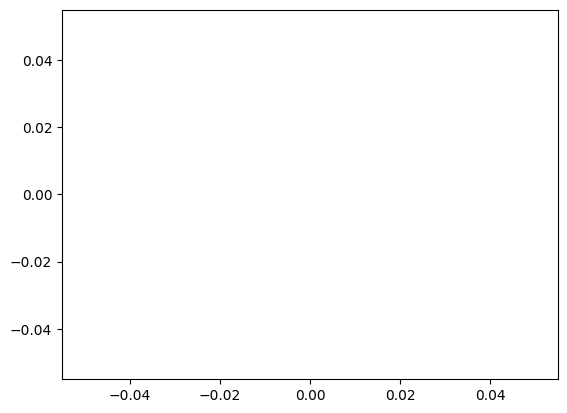

In [61]:
df_prices[(df_prices['ticker'] == 'STZ')]
fig, ax = plt.subplots()
ax.plot(df_prices[df_prices['ticker'] == 'STZ']['date'], df_prices[df_prices['ticker'] == 'STZ']['prc'])
ax.set_xticks(['2010-01-04', '2015-01-02', '2020-01-02', '2025-01-02'])
plt.show()

In [62]:
df_weights_cropped.sum(axis=1)

# portfolio_returns.loc['2020_Q1']

q
2010_Q1    1.0
2010_Q2    1.0
2010_Q3    1.0
2010_Q4    1.0
2011_Q1    1.0
2011_Q2    1.0
2011_Q3    1.0
2011_Q4    1.0
2012_Q1    1.0
2012_Q2    1.0
2012_Q3    1.0
2012_Q4    1.0
2013_Q1    1.0
2013_Q2    1.0
2013_Q3    1.0
2013_Q4    1.0
2014_Q1    1.0
2014_Q2    1.0
2014_Q3    1.0
2014_Q4    1.0
2015_Q1    1.0
2015_Q2    1.0
2015_Q3    1.0
2015_Q4    1.0
2016_Q1    1.0
2016_Q2    1.0
2016_Q3    1.0
2016_Q4    1.0
2017_Q1    1.0
2017_Q2    1.0
2017_Q3    1.0
2017_Q4    1.0
2018_Q1    1.0
2018_Q2    1.0
2018_Q3    1.0
2018_Q4    1.0
2019_Q1    1.0
2019_Q2    1.0
2019_Q3    1.0
2019_Q4    1.0
2020_Q1    1.0
2020_Q2    1.0
2020_Q3    1.0
2020_Q4    1.0
2021_Q1    1.0
2021_Q2    1.0
2021_Q3    1.0
2021_Q4    1.0
2022_Q1    1.0
2022_Q2    1.0
2022_Q3    1.0
2022_Q4    1.0
2023_Q1    1.0
2023_Q2    1.0
2023_Q3    1.0
2023_Q4    1.0
2024_Q1    1.0
2024_Q2    1.0
2024_Q3    1.0
2024_Q4    1.0
dtype: float64

<h2> APPENDIX </h2>

In [128]:
# df_multi = df_multi.pivot(columns = 'tic', values = 'atq')

In [94]:
# db.list_tables('comp')

In [43]:
a = db.describe_table('comp', 'fundq')
a

Approximately 2089769 rows in comp.fundq.


,name,nullable,type,comment
0,gvkey,True,VARCHAR(6),Global Company Key
1,datadate,True,DATE,Data Date
2,fyearq,True,INTEGER,Fiscal Year
3,fqtr,True,SMALLINT,Fiscal Quarter
4,fyr,True,SMALLINT,Fiscal Year-end Month
...,...,...,...,...
642,mkvaltq,True,"NUMERIC(18, 4)",Market Value - Total
643,prccq,True,"NUMERIC(24, 12)",Price Close - Quarter
644,prchq,True,"NUMERIC(24, 12)",Price High - Quarter
645,prclq,True,"NUMERIC(24, 12)",Price Low - Quarter


In [33]:
a[a['name'] == 'atq']

,name,nullable,type,comment
58,atq,True,"NUMERIC(18, 4)",Assets - Total


In [36]:
a[a['name'].str.contains('ti')]

,name,nullable,type,comment
9,tic,True,VARCHAR(8),Ticker Symbol
332,tieq,True,"NUMERIC(18, 4)",Interest Expense - Total (Financial Services)
333,tiiq,True,"NUMERIC(18, 4)",Interest Income - Total (Financial Services)
432,dltisy,True,"NUMERIC(18, 4)",Long-Term Debt - Issuance
586,tiey,True,"NUMERIC(18, 4)",Interest Expense - Total (Financial Services)
587,tiiy,True,"NUMERIC(18, 4)",Interest Income - Total (Financial Services)


In [104]:
query1 = """
SELECT gvkey, tic, datadate, fyearq, atq
FROM comp.fundq
WHERE tic = 'FOXA'
ORDER BY tic, datadate;
"""
db.raw_sql(query1)

,gvkey,tic,datadate,fyearq,atq
0,034636,FOXA,2016-09-30,2017,<NA>
1,034636,FOXA,2016-12-31,2017,<NA>
2,034636,FOXA,2017-03-31,2017,<NA>
3,034636,FOXA,2017-06-30,2017,10348.0
4,034636,FOXA,2017-09-30,2018,<NA>
5,034636,FOXA,2017-12-31,2018,<NA>
6,034636,FOXA,2018-03-31,2018,<NA>
7,034636,FOXA,2018-06-30,2018,13121.0
8,034636,FOXA,2018-09-30,2019,14078.0
9,034636,FOXA,2018-12-31,2019,13466.0


In [92]:
brk

,gvkey,tic,datadate,fyearq,atq
0,002176,BRK.B,1982-03-31,1982,1113.016
1,002176,BRK.B,1982-06-30,1982,1083.254
2,002176,BRK.B,1982-09-30,1982,1197.691
3,002176,BRK.B,1982-12-31,1982,1485.624
4,002176,BRK.B,1983-03-31,1983,1550.511
...,...,...,...,...,...
170,002176,BRK.B,2024-09-30,2024,1147251.0
171,002176,BRK.B,2024-12-31,2024,1153881.0
172,002176,BRK.B,2025-03-31,2025,1164532.0
173,002176,BRK.B,2025-06-30,2025,1163968.0


In [72]:
query1 = """
SELECT gvkey, tic, datadate, fyearq, atq
FROM comp.fundq
WHERE tic IN (
"""
query2 = ") ORDER BY tic, datadate;"
query3 = str(sp500_tickers)
query3 = query3[1:]
query3 = query3[:-1]
query = query1 + query3 + query2
# print(query)
df = db.raw_sql(query)

In [73]:
df.tail(10)

,gvkey,tic,datadate,fyearq,atq
79402,013721,ZTS,2023-06-30,2023,13749.0
79403,013721,ZTS,2023-09-30,2023,14106.0
79404,013721,ZTS,2023-12-31,2023,14286.0
79405,013721,ZTS,2024-03-31,2024,14348.0
79406,013721,ZTS,2024-06-30,2024,14165.0
79407,013721,ZTS,2024-09-30,2024,14357.0
79408,013721,ZTS,2024-12-31,2024,14237.0
79409,013721,ZTS,2025-03-31,2025,14098.0
79410,013721,ZTS,2025-06-30,2025,14479.0
79411,013721,ZTS,2025-09-30,2025,<NA>


In [80]:
existing = df['tic'].unique()

In [82]:
missing

['GOOG', 'BRK-B', 'BF-B', 'FOX', 'NWS']

In [87]:
print('BRK-A' in sp500_tickers)

False


In [59]:
query = """
SELECT *
FROM crsp_a_indexes.msp500
-- WHERE ending >= '2025-11-01'
"""
db.raw_sql(query)

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
0,1925-12-31,<NA>,<NA>,<NA>,<NA>,15236829.5,89,<NA>,<NA>,12.46,<NA>
1,1926-01-30,-0.001783,-0.00398,0.006457,0.00325,15277664.0,89,15236829.5,79,12.74,0.022472
2,1926-02-27,-0.033297,-0.037876,-0.039979,-0.042451,14712894.9,89,15277664.0,81,12.18,-0.043956
3,1926-03-31,-0.057708,-0.062007,-0.067915,-0.073275,14012079.2,89,14712894.9,81,11.46,-0.059113
4,1926-04-30,0.038522,0.034856,0.031441,0.027121,14500482.2,89,14012079.2,82,11.72,0.022688
...,...,...,...,...,...,...,...,...,...,...,...
1184,2024-08-30,0.024283,0.022898,0.024943,0.023052,49374744200.0,503,48316466000.0,503,5648.4,0.022835
1185,2024-09-30,0.022821,0.021707,0.023343,0.021562,50545366000.0,504,49480802000.0,503,5762.48,0.020197
1186,2024-10-31,-0.00869,-0.009523,-0.01641,-0.017365,50032687000.0,503,50538371900.0,503,5705.45,-0.009897
1187,2024-11-29,0.06042,0.059016,0.062051,0.06017,53001191200.0,503,50043984400.0,503,6032.38,0.057301


In [219]:
db.describe_table('crsp','dsf')

Approximately 107682104 rows in crsp.dsf.


,name,nullable,type,comment
0,cusip,True,VARCHAR(8),CUSIP Header
1,permno,True,INTEGER,PERMNO
2,permco,True,INTEGER,PERMCO
3,issuno,True,INTEGER,Nasdaq Issue Number
4,hexcd,True,SMALLINT,Exchange Code Header
5,hsiccd,True,INTEGER,Standard Industrial Classification Code Header
6,date,True,DATE,Date of Observation
7,bidlo,True,"NUMERIC(11, 5)",Bid or Low Price
8,askhi,True,"NUMERIC(11, 5)",Ask or High Price
9,prc,True,"NUMERIC(11, 5)",Price or Bid/Ask Average


In [220]:
db.describe_table('crsp','stocknames')

Approximately 83280 rows in crsp.stocknames.


,name,nullable,type,comment
0,permno,True,INTEGER,PERMNO
1,namedt,True,DATE,None
2,nameenddt,True,DATE,None
3,shrcd,True,SMALLINT,Share Code as of Name Start Date
4,exchcd,True,SMALLINT,Exchange Code
5,siccd,True,INTEGER,SIC Code as of Name Start Date
6,ncusip,True,VARCHAR(8),CUSIP
7,ticker,True,VARCHAR(8),Ticker Symbol
8,comnam,True,VARCHAR(35),Company Name
9,shrcls,True,VARCHAR(4),Share Class as of Name Start Date
